<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Load" data-toc-modified-id="Model-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model Load</a></span><ul class="toc-item"><li><span><a href="#Simple-CNN" data-toc-modified-id="Simple-CNN-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple CNN</a></span></li><li><span><a href="#Simple-CNN-+-CAM" data-toc-modified-id="Simple-CNN-+-CAM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simple CNN + CAM</a></span></li><li><span><a href="#Simple-CNN-+-CBAM" data-toc-modified-id="Simple-CNN-+-CBAM-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simple CNN + CBAM</a></span></li><li><span><a href="#RAN" data-toc-modified-id="RAN-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>RAN</a></span></li></ul></li><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Comparison-of-models" data-toc-modified-id="Comparison-of-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison of models</a></span></li><li><span><a href="#Comparison-of-model-training-logs" data-toc-modified-id="Comparison-of-model-training-logs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison of model training logs</a></span></li></ul></div>

This notebook will check the results of your assessment of MNIST and CIFAR10 as a trained model. So if you don't have a pretrained model, you'll have to run it through the command below and then create a trained model first.

```bash
$ python main.py --target=['mnist','cifar10'] --attention=['CAM','CBAM','RAN','WARN']
```

In [13]:
import torch 

import pandas as pd
import numpy as np
import sys
import json
sys.path.append('../code')

from models import SimpleCNN, RAN
from utils import compare_model_acc, count_params
from visualization import visualize_trainlogs
from dataload import mnist_load, cifar10_load

device = 'cuda' 

# Model Load

In [2]:
def model_load(model_name, model):
    # model
    net = torch.load('../checkpoint/{}.pth'.format(model_name))
    model.load_state_dict(net['model'])
    # log
    log = json.load(open('../logs/{}_logs.txt'.format(model_name)))

    return model, log

## Simple CNN

<img src="https://github.com/TooTouch/WhiteBox-Part1/blob/master/images/models/simple_cnn_architecture.png?raw=true" width="400">

In [3]:
mnist_cnn = SimpleCNN('mnist')
mnist_cnn, mnist_cnn_log = model_load('simple_cnn_mnist', mnist_cnn)

cifar10_cnn = SimpleCNN('cifar10')
cifar10_cnn, cifar10_cnn_log = model_load('simple_cnn_cifar10', cifar10_cnn)

Model Complete
Model Complete


## Simple CNN + CAM

**Class Activation Map (CAM) Architecture**
<img src="https://github.com/TooTouch/WhiteBox-Part1/blob/master/images/models/CAM.JPG?raw=true" width="600">

In [4]:
mnist_cnn_CAM = SimpleCNN('mnist', 'CAM')
mnist_cnn_CAM, mnist_cnn_CAM_log = model_load('simple_cnn_mnist_CAM', mnist_cnn_CAM)

cifar10_cnn_CAM = SimpleCNN('cifar10', 'CAM')
cifar10_cnn_CAM, cifar10_cnn_CAM_log = model_load('simple_cnn_cifar10_CAM', cifar10_cnn_CAM)

Model Complete
Model Complete


## Simple CNN + CBAM
**Convolutional Block Attention Module(CBAM)**
<img src="https://github.com/TooTouch/WhiteBox-Part1/blob/master/images/models/CBAM1.JPG?raw=true" width="400">

**Diagram of each attention sub-module**
<img src="https://github.com/TooTouch/WhiteBox-Part1/blob/master/images/models/CBAM2.JPG?raw=true" width="400">

In [5]:
mnist_cnn_CBAM = SimpleCNN('mnist', 'CBAM')
mnist_cnn_CBAM, mnist_cnn_CBAM_log = model_load('simple_cnn_mnist_CBAM', mnist_cnn_CBAM)

cifar10_cnn_CBAM = SimpleCNN('cifar10', 'CBAM')
cifar10_cnn_CBAM, cifar10_cnn_CBAM_log = model_load('simple_cnn_cifar10_CBAM', cifar10_cnn_CBAM)

Model Complete
Model Complete


## RAN

**Residual Attention Network(RAN) Architecture**

<img src="https://github.com/TooTouch/WhiteBox-Part1/blob/master/images/models/RAN.JPG?raw=true" width="600">

In [6]:
mnist_RAN = RAN('mnist')
mnist_RAN, mnist_RAN_log = model_load('mnist_RAN', mnist_RAN)

cifar10_RAN = RAN('cifar10')
cifar10_RAN, cifar10_RAN_log = model_load('cifar10_RAN', cifar10_RAN)

# Data Load

**MNIST**

In [7]:
_, _, mnist_testloader = mnist_load(shuffle=False)
# idx2class
mnist_testloader.dataset.class_to_idx

Data Complete


{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

**CIFAR10**

In [8]:
_, _, cifar10_testloader = cifar10_load(shuffle=False)
# idx2class
cifar10_testloader.dataset.class_to_idx

Files already downloaded and verified
Files already downloaded and verified
Data Complete


{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

# Comparison of models

In [9]:
model_names = ['Simple CNN','Simple CNN + CAM', 'Simple CNN + CBAM', 'RAN']

In [19]:
mnist_models = [mnist_cnn, mnist_cnn_CAM, mnist_cnn_CBAM, mnist_RAN]
cifar10_models = [cifar10_cnn, cifar10_cnn_CAM, cifar10_cnn_CBAM, cifar10_RAN]

mnist_models_params = list(map(count_params, mnist_models))
cifar10_models_params = list(map(count_params, cifar10_models))

mnist_params_df = pd.DataFrame({'MNIST':mnist_models_params}, index=model_names)
cifar10_params_df = pd.DataFrame({'CIFAR10':cifar10_models_params}, index=model_names)

It took about 2 minutes per dataset.

In [11]:
mnist_acc_df = compare_model_acc(mnist_models, mnist_testloader, model_names)

In [12]:
cifar10_acc_df = compare_model_acc(cifar10_models, cifar10_testloader, model_names)

**Mnist Accuracy**

In [17]:
pd.concat([mnist_params_df, mnist_acc_df], axis=1)

,MNIST,0 - zero,1 - one,2 - two,3 - three,4 - four,5 - five,6 - six,7 - seven,8 - eight,9 - nine,Total
Simple CNN,1284042,0.998,0.996,0.995,0.998,0.996,0.992,0.993,0.989,0.997,0.985,0.994
Simple CNN + CAM,1285332,0.994,0.995,0.989,0.995,0.988,0.988,0.993,0.981,0.986,0.977,0.988
Simple CNN + CBAM,1288561,0.998,0.995,0.992,0.996,0.990,0.990,0.990,0.991,0.995,0.989,0.993
RAN,27987466,0.997,0.998,0.996,0.995,0.989,0.991,0.996,0.988,0.994,0.990,0.994


**CIFAR10 Accuracy**

In [20]:
pd.concat([cifar10_params_df, cifar10_acc_df], axis=1)

,CIFAR10,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,Total
Simple CNN,2202122,0.884,0.931,0.773,0.653,0.875,0.828,0.902,0.855,0.920,0.904,0.852
Simple CNN + CAM,2203412,0.760,0.896,0.585,0.477,0.752,0.804,0.769,0.711,0.837,0.862,0.745
Simple CNN + CBAM,2206641,0.858,0.945,0.749,0.685,0.790,0.761,0.826,0.798,0.873,0.896,0.818
RAN,27990666,0.843,0.882,0.758,0.701,0.776,0.586,0.916,0.844,0.924,0.873,0.810


# Comparison of model training logs

**Details**
- MNIST models train 30 epochs. 
- CIFAR10 models train 100 epochs. 
- optimizer: SGD(learning rate=0.01)
- batch size: 128
- loss function: cross entropy

In [69]:
mnist_logs = [mnist_cnn_log, mnist_cnn_CAM_log, mnist_cnn_CBAM_log, mnist_RAN_log]
cifar10_logs = [cifar10_cnn_log, cifar10_cnn_CAM_log, cifar10_cnn_CBAM_log, cifar10_RAN_log]

**MNIST**

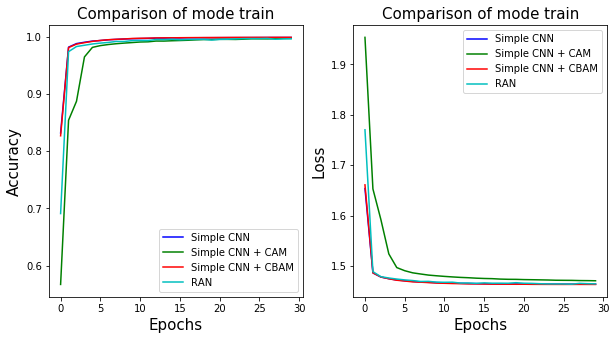

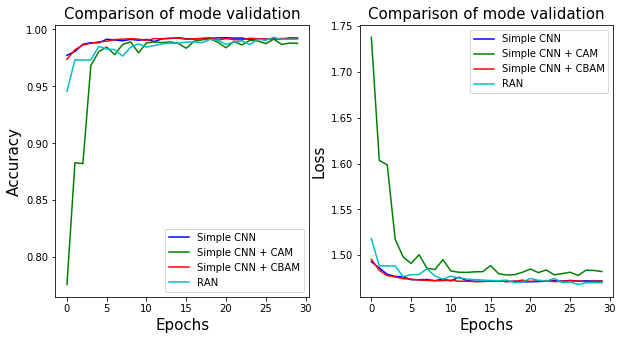

In [80]:
visualize_models_log(mnist_logs, model_names, 'train',
                     size=(10,5), nb_epochs=30, fontsize=15)
visualize_models_log(mnist_logs, model_names, 'validation',
                     size=(10,5), nb_epochs=30, fontsize=15)

**CIFAR10**

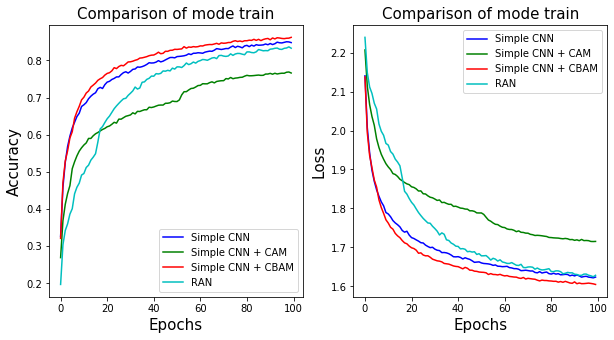

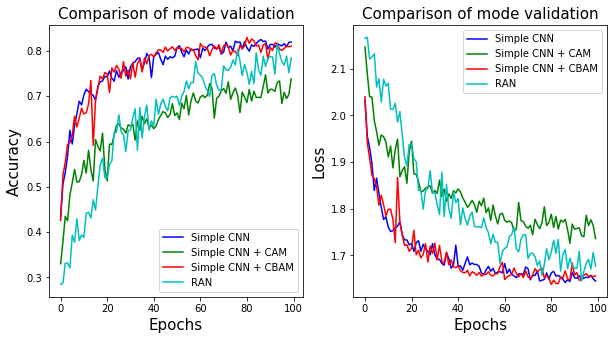

In [79]:
visualize_models_log(cifar10_logs, model_names, 'train',
                     size=(10,5), nb_epoch=100, fontsize=15)
visualize_models_log(cifar10_logs, model_names, 'validation',
                     size=(10,5), nb_epoch=100, fontsize=15)